# Data 전처리(EDA)

In [1]:
import pandas as pd
import numpy as np

# 0. Data Load
data = {
    'age': [25, 27, np.nan, 29, 31, np.nan, 35],
    'income': [50000, 54000, 58000, np.nan, 61000, 62000, np.nan]
}

df = pd.DataFrame(data)

# 1. 결측치 처리

In [2]:
## 결측치 확인
df.isnull().sum()

## 결측치 삭제 - data가 많고 결측치가 적을때 결정
# df.dropna()

age       2
income    2
dtype: int64

In [3]:
# 결측치 처리방법 제공
from sklearn.impute import SimpleImputer 

# 다음 작업에도 소수점 제거가 사라지지 않아서 주석화
# pd.set_option('display.float_format', '{:.0f}'.format)
# np.set_printoptions(suppress=True)

imputer = SimpleImputer(strategy='mean') # median / most_frequent(없으면 첫번째값) / constant 
#imputer = SimpleImputer(strategy='constant', fill_value=10)

result = imputer.fit_transform(df[['age', 'income']])
print(result)

df[['age', 'income']] = result
df

[[2.50e+01 5.00e+04]
 [2.70e+01 5.40e+04]
 [2.94e+01 5.80e+04]
 [2.90e+01 5.70e+04]
 [3.10e+01 6.10e+04]
 [2.94e+01 6.20e+04]
 [3.50e+01 5.70e+04]]


,age,income
0,25.0,50000.0
1,27.0,54000.0
2,29.4,58000.0
3,29.0,57000.0
4,31.0,61000.0
5,29.4,62000.0
6,35.0,57000.0


# 2. 이상치 처리 - 가능하면 제외하는걸 추천

In [4]:
## 파악 : 시각화, IQR, Z-score 등
# 추천 : IQR(정규분포를 따르지 않아도 활용 가능)
# Z-score : 정규분포인 경우는 추천

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head() # 그냥 찍으면 Data가 많을 경우 문제가 생길 수 있으니 head 찍는 습관


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
# 목표값 추가
df['target'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.info() # 가장 먼저 데이터형을 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [9]:
# 이상치 제거 함수(데이터가 적은 경우는 한 행씩 제거하는 경우는, IQR 값이 변하기 때문에 영향이 있음 - 제거보다는 대치 고려)
## 이상치가 너무 많으면 대치 : 평균, 중간값 등 고려

def remove_iqr(df, columns): # ['c1','c2']
    
    clean_data = df.copy() # 복사본 생성
    
    for col in columns:
        Q1 = clean_data[col].quantile(0.25)
        Q3 = clean_data[col].quantile(0.75)
        
        IQR = Q3 - Q1
        lower = Q1 - (1.5 * IQR) # 연산자간에 () 주의
        upper = Q3 + (1.5 * IQR)
        
        clean_data = clean_data[(clean_data[col] >= lower) & (clean_data[col] <= upper)]

    return clean_data

In [10]:
# 컬럼 순서에 따라 달라지는 차이 보정 함수
def remove_iqr_same(df, columns):
    
    df_clean = df.copy()

    ranges = []
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
    
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
    
        ranges.append((lower, upper))
    
    for index, col in enumerate(columns):
        lower, upper = ranges[index]
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

    return df_clean

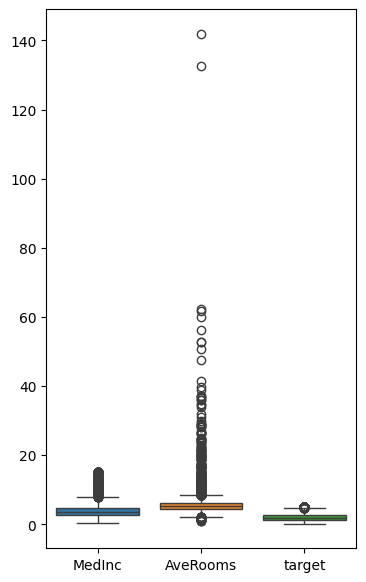

(20640, 9)


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,7))
sns.boxplot(data=df[['MedInc','AveRooms','target']])
plt.show()

print(df.shape)

(18974, 9)


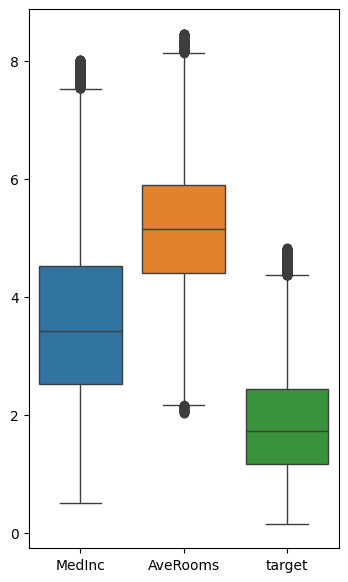

In [12]:
df_cleaned = remove_iqr_same(df, ['MedInc','AveRooms','target'])
print(df_cleaned.shape)

plt.figure(figsize=(4,7))
sns.boxplot(data=df_cleaned[['MedInc','AveRooms','target']])
plt.show()

# 3. 범주형 인코딩 - 숫자로 변환
### 어떤 컬럼을, 어떤 방식으로 encoding하는지 결정하는게 포인트
### 어떤 컬럼 : 상관 관계 분석으로 어떤게 독립변수인지 파악(도메인 지식이 중요)

In [13]:
from sklearn.preprocessing import LabelEncoder

data = {
    'gender' : ['male', 'female', 'female', 'male', 'female'],
    'grade' : ['A', 'B', 'A', 'C', 'B']
}

df = pd.DataFrame(data)
df

,gender,grade
0,male,A
1,female,B
2,female,A
3,male,C
4,female,B


In [14]:
# Lable Encoder - 주로 많이 사용(임의의 값을 지정하여 적용)

le_gender = LabelEncoder()
le_grade = LabelEncoder()

df['gender_encode'] = le_gender.fit_transform(df['gender']) # male 1, female 0
df['grade_encode'] = le_grade.fit_transform(df['grade']) # grade A 0, grade B 1, grade C 2
df

# A_101의 경우 > 1101과 같은 형태 고려

,gender,grade,gender_encode,grade_encode
0,male,A,1,0
1,female,B,0,1
2,female,A,0,0
3,male,C,1,2
4,female,B,0,1


In [15]:
# One Hot Encoder

df = pd.get_dummies(df, columns=['grade']) # 해당하는 값에 따라 True, False(1,0)로 처리
df

,gender,gender_encode,grade_encode,grade_A,grade_B,grade_C
0,male,1,0,True,False,False
1,female,0,1,False,True,False
2,female,0,0,True,False,False
3,male,1,2,False,False,True
4,female,0,1,False,True,False


# 4. 스케일링/정규화
### 값 자체의 크기가 결과에 영향을 주지 못하도록 처리
### (방 갯수 10개, 지하철까지 거리 1000000KM => 집 값이 낮게)
### Train기준으로 Test에도 Scaler를 적용해야 함!

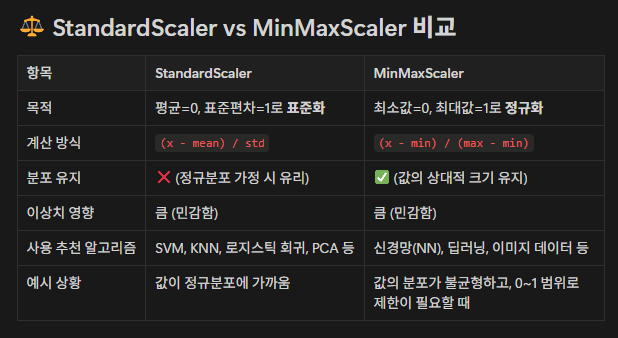

In [16]:
# Train기준으로 Test에도 Scaler를 적용해야 함!

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

data = {
    'height': [150, 160, 165, 180, 155],
    'weight': [60, 65, 55, 90, 62]
}   

df = pd.DataFrame(data)
df

,height,weight
0,150,60
1,160,65
2,165,55
3,180,90
4,155,62


In [17]:
std_scaler = StandardScaler() # 표준화(머신러닝에서 가장 일반적)

df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=['height_std', 'weight_std']) 
df_std

,height_std,weight_std
0,-1.165543,-0.522837
1,-0.194257,-0.114371
2,0.291386,-0.931303
3,1.748315,1.927960
4,-0.679900,-0.359450


In [18]:
minmax_scaler = MinMaxScaler() # 정규화(딥러닝이나 이미지처리에서 고려)

df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=['height_minmax', 'weight_minmax']) 
df_minmax

,height_minmax,weight_minmax
0,0.000000,0.142857
1,0.333333,0.285714
2,0.500000,0.000000
3,1.000000,1.000000
4,0.166667,0.200000


# 5. 데이터 분할 (Train/Test)

In [19]:
# 5. 데이터 분할 (Train/Test)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
y # 뒤쪽에 2번이 편중되어 있음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
# 순서 주의 / 분류의 기준, 편중 방지의 기준은 y(결과값)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 기본값은 random => 편중 가능성 있음

# stratify : y를 기준으로 비율을 맞춰서 분류
# random_state : 기본적으로 random 추출이기 때문에, model 비교를 위해서는 특정 seed 값을 정하고 추출해야 영향 x
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=77)

print(y_train)
print(y_test)

[0 2 1 1 2 0 2 1 2 1 2 0 1 2 0 2 2 1 2 0 0 1 1 1 2 1 0 2 2 2 0 2 0 2 2 1 2
 1 1 1 0 2 2 0 1 1 1 1 1 2 2 1 0 0 2 1 0 2 0 0 0 1 0 0 0 0 0 2 2 0 2 1 1 2
 2 1 1 1 0 2 2 1 2 1 0 1 2 0 1 0 0 0 1 0 2 0 0 0 1 0 1 2 2 1 2 2 1 2 1 1 0
 1 0 0 0 2 0 0 1 2]
[2 1 2 2 0 0 1 0 1 0 2 2 0 2 1 0 1 1 1 2 0 0 0 2 1 1 1 0 2 2]


In [21]:
import pandas as pd

df = pd.DataFrame(data=iris.data , columns = iris.feature_names)
df['target'] = iris.target

X = df.drop('target', axis=1) # 답을 제거해서 주기 위함(axis=0 : 행)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=7)

In [22]:
# K-fold
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier # 분류 모델
from sklearn.model_selection import StratifiedKFold

X, y = load_iris(return_X_y=True) # Data

model = RandomForestClassifier() # Model

# 정답의 비율에 맞게 분류(그냥 cv에 숫자만 넣으면 단순 random 추출) 
# n_splits : 나눌 fold의 수
cv = StratifiedKFold(n_splits=5) 

score = cross_val_score(model, X , y, cv=cv) # 학습과 결과값 도출까지 한번에 실행
score.mean()

0.9666666666666668

# *** 피처 엔지니어링 (선택사항)

- 기존 데이터를 기반으로 **새로운 특성 생성**
- 예시:
    - 날짜 → 요일, 월 => 2025/08/05 -> 화요일
    - 텍스트 → 길이, 단어 수
    - 범주 + 수치 조합

참고 링크 : https://www.notion.so/2-23e179cfab9480c0a5eaee669f487b4a    